In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
from pandas_datareader import DataReader

In [6]:
from datetime import datetime

In [7]:
tech_list =['AAPL','GOOG','MSFT','AMZN','TSLA','CRWD','PLTR','OKTA']

In [8]:
end = datetime.now()
start = datetime(end.year -1, end.month, end.day)

In [9]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,95.748621,93.026518,94.359712,94.458660,1.534722e+08,94.146749
std,21.683346,21.163311,21.588370,21.408690,7.238685e+07,21.551179
min,57.125000,53.152500,57.020000,56.092499,2.420510e+07,55.744217
25%,77.552502,75.539375,76.114376,77.105625,1.060912e+08,76.625437
50%,91.667500,89.511250,90.993752,91.027496,1.374766e+08,90.707176
75%,116.947500,113.936249,115.550003,115.405001,1.830576e+08,115.212751
max,137.979996,131.100006,137.589996,134.179993,4.268848e+08,133.948898


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-12-27 to 2020-12-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

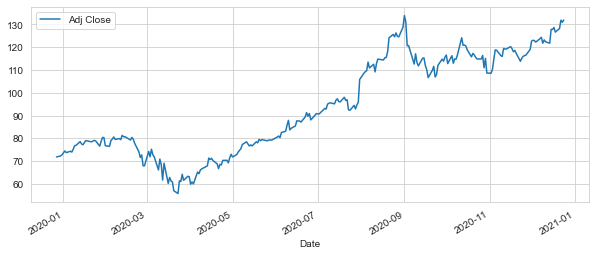

In [12]:
AAPL['Adj Close'].plot(legend = True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

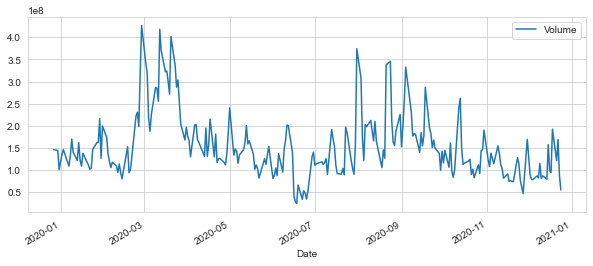

In [13]:
AAPL['Volume'].plot(legend = True, figsize=(10,4))

In [16]:
ma_day=[10,20,50]
for ma in ma_day:
    column_name='MA {}'.format(ma)
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

In [17]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50
Date,,,,,,,,,
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.829674,NaN,NaN,NaN
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,72.255997,NaN,NaN,NaN
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.783936,NaN,NaN,NaN
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.444603,NaN,NaN,NaN
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.720840,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

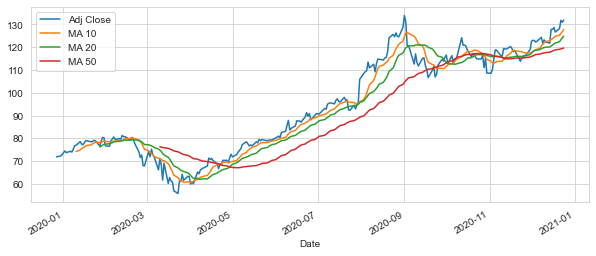

In [31]:
#AAPL['Adj Close'].plot(subplots=False, figsize(10,4))
AAPL[['Adj Close','MA 10','MA 20','MA 50']].plot(subplots=False, figsize=(10,4))

In [32]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()

In [33]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.829674,NaN,NaN,NaN,NaN
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,72.255997,NaN,NaN,NaN,0.005935
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.783936,NaN,NaN,NaN,0.007307
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.444603,NaN,NaN,NaN,0.022816
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.720840,NaN,NaN,NaN,-0.009722


<AxesSubplot:xlabel='Date'>

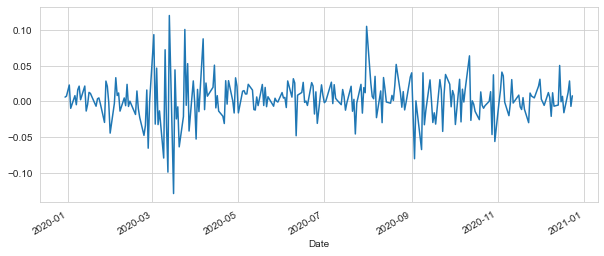

In [34]:
AAPL['Daily Return'].plot(figsize=(10,4))

/Users/kenichiroouchi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

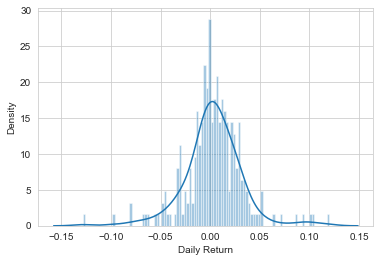

In [36]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100)

In [44]:
closing_df=DataReader(['AAPL','GOOG','MSFT','AMZN','TSLA','CRWD','PLTR','OKTA','^TNX'], 'yahoo', start, end)['Adj Close']

In [45]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA,CRWD,PLTR,OKTA,^TNX
Date,,,,,,,,,
2019-12-27,71.829674,1351.890015,157.293686,1869.800049,86.075996,48.919998,NaN,119.919998,1.874
2019-12-30,72.255997,1336.140015,155.938049,1846.890015,82.940002,50.029999,NaN,114.300003,1.895
2019-12-31,72.783936,1337.020020,156.046890,1847.839966,83.666000,49.869999,NaN,115.370003,1.919
2020-01-02,74.444603,1367.369995,158.936279,1898.010010,86.052002,49.439999,NaN,117.309998,1.882
2020-01-03,73.720840,1360.660034,156.957260,1874.969971,88.601997,50.750000,NaN,118.290001,1.788


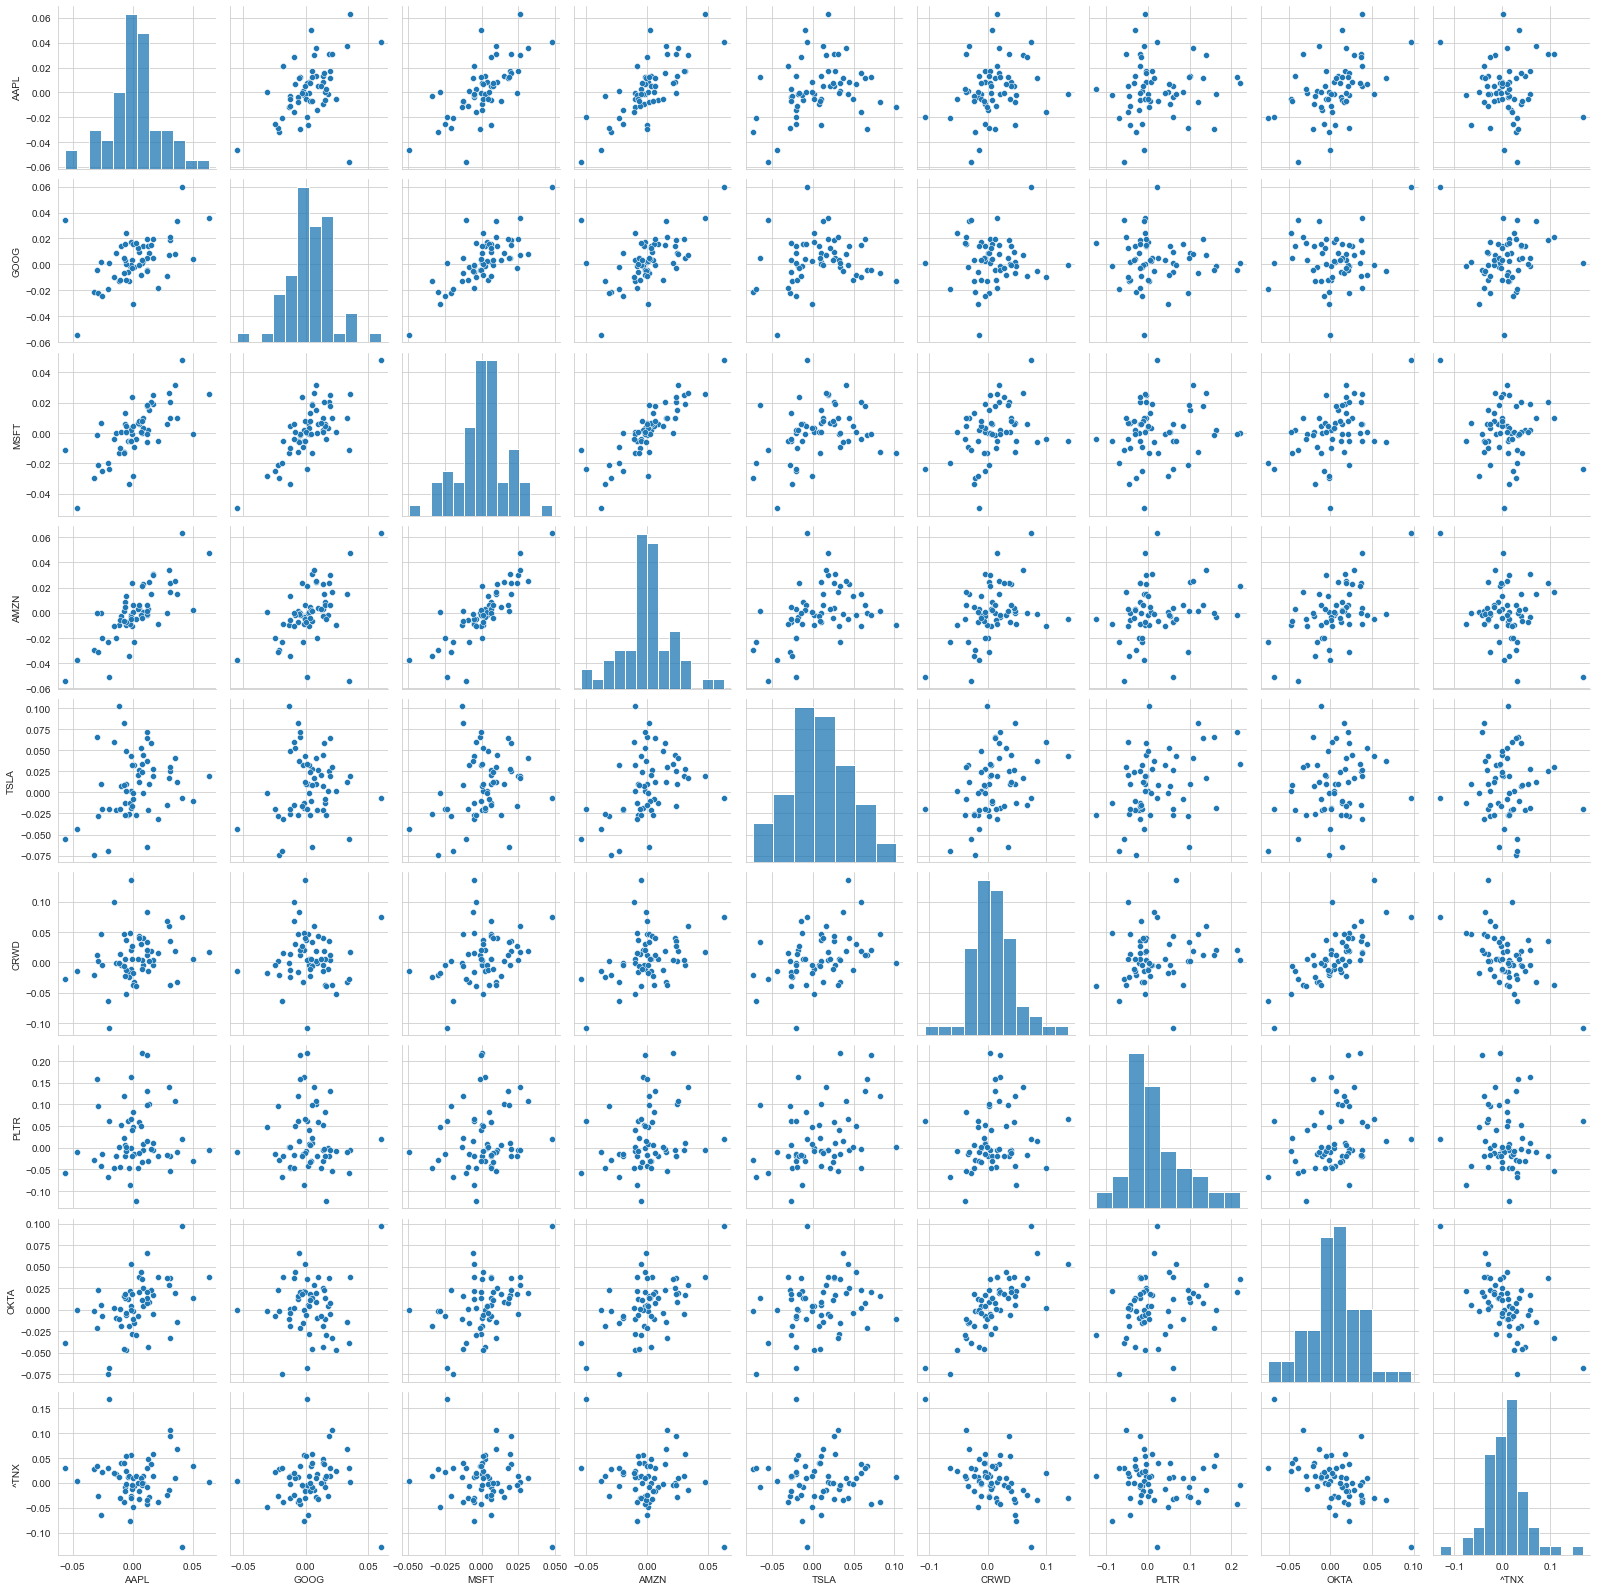

In [51]:
tech_rets = closing_df.pct_change()
sns.pairplot(tech_rets.dropna())

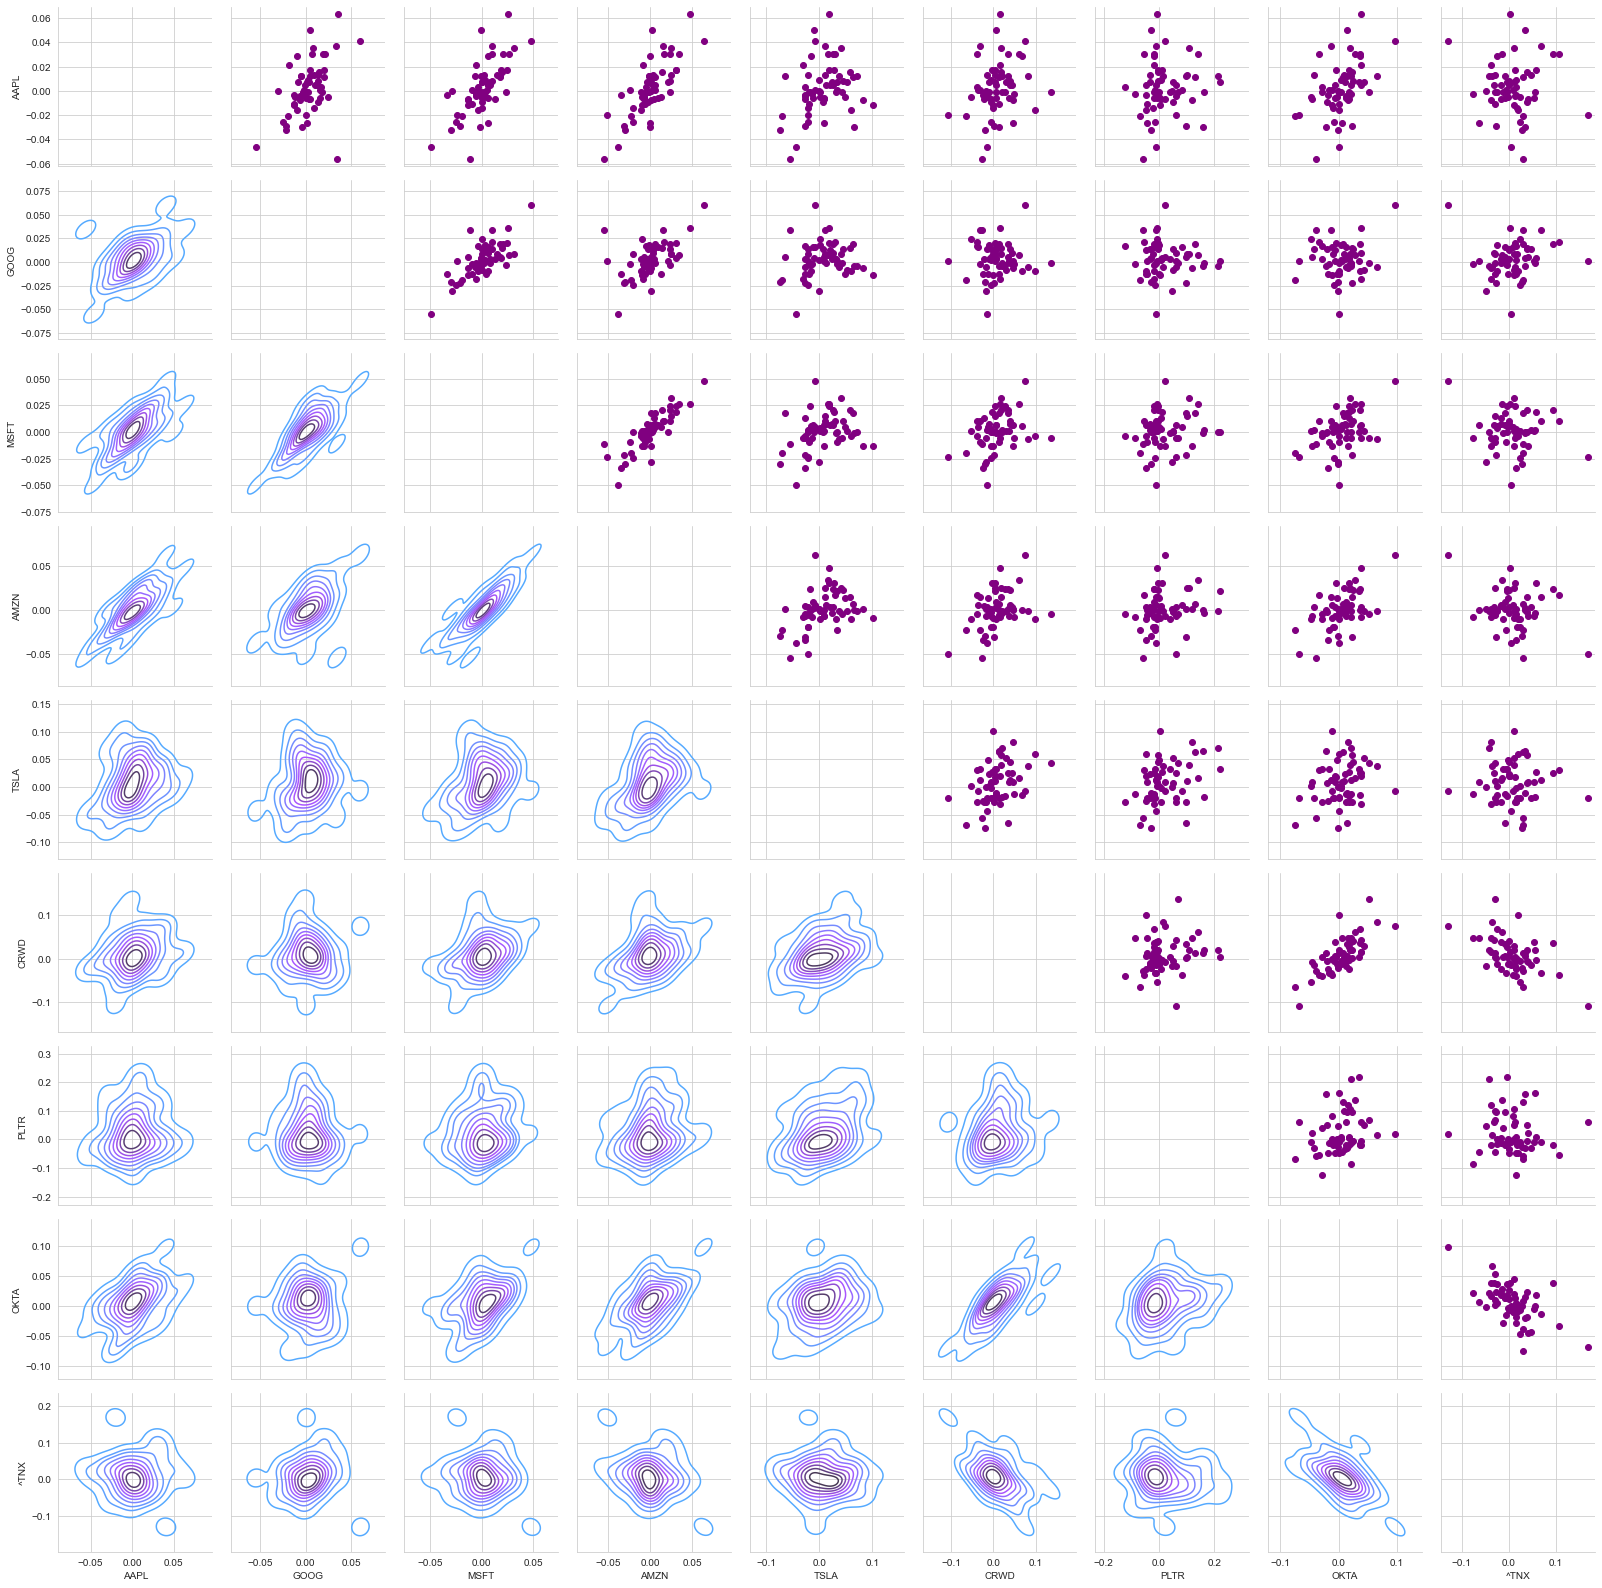

In [55]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=10)

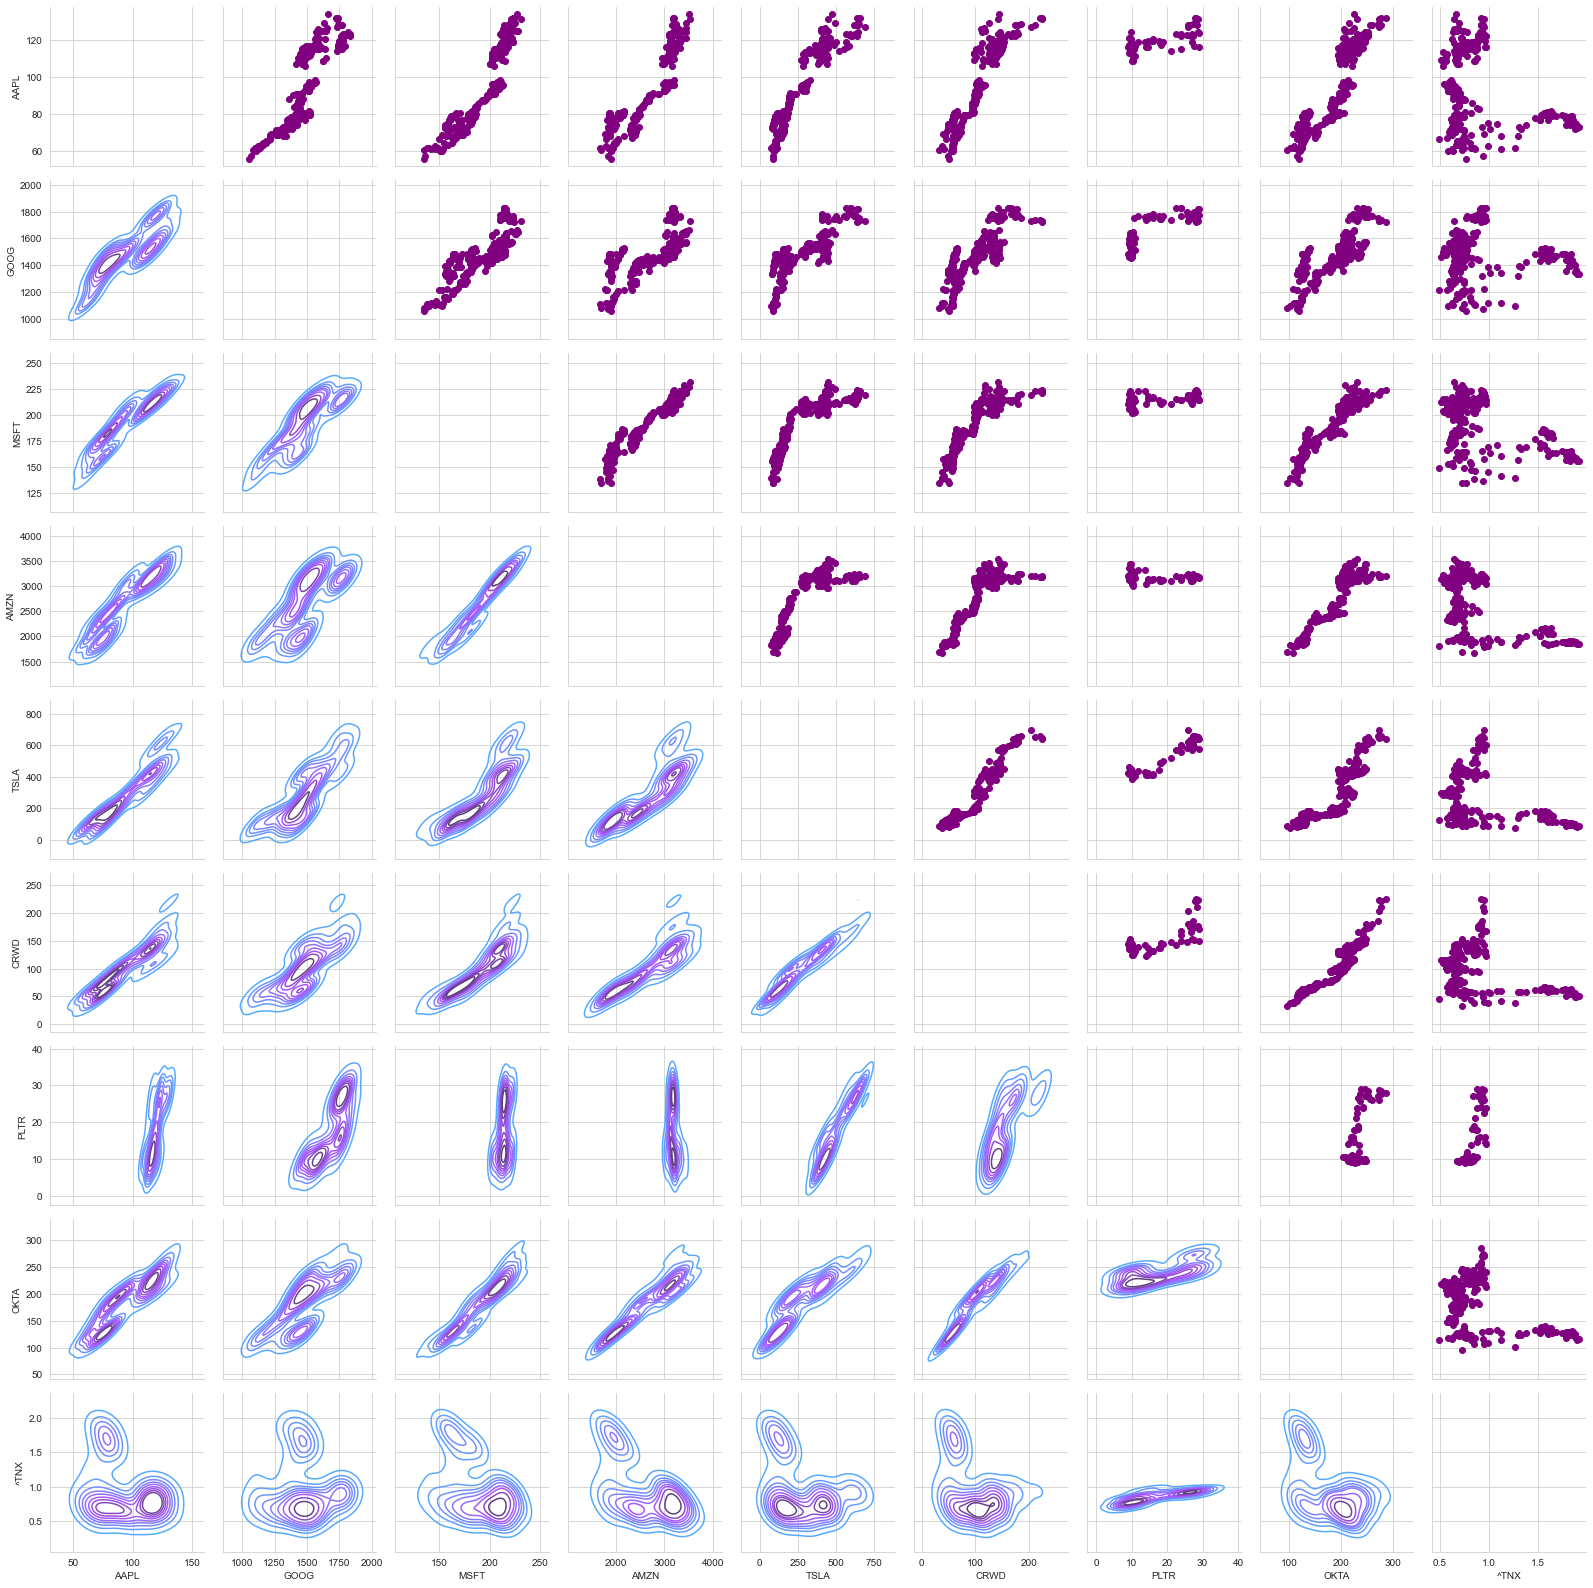

In [56]:
return_fig = sns.PairGrid(closing_df)
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=10)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

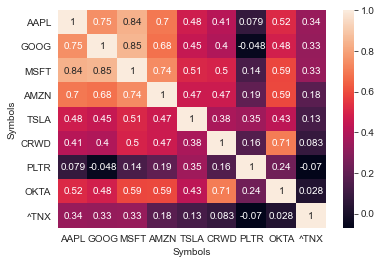

In [58]:
sns.heatmap(tech_rets.corr(),annot=True)

In [59]:
rets = tech_rets.dropna()

In [60]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA,CRWD,PLTR,OKTA,^TNX
Date,,,,,,,,,
2020-10-01,0.008462,0.013943,0.010127,0.023035,0.044638,0.040416,-0.004211,0.025485,0.000000
2020-10-02,-0.032280,-0.021254,-0.029511,-0.029883,-0.073791,-0.020998,-0.027484,-0.001094,0.028065
2020-10-05,0.030791,0.018925,0.020321,0.023744,0.025513,0.035819,-0.018478,0.037433,0.094828
2020-10-06,-0.028669,-0.021924,-0.021247,-0.031020,-0.027485,0.001726,0.096346,0.023013,-0.026247
2020-10-07,0.016967,0.004713,0.019037,0.030881,0.027344,-0.003859,0.010101,0.017678,0.057952


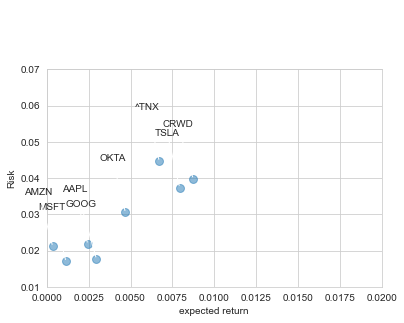

In [68]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)
plt.ylim([0.01, 0.07])
plt.xlim([0,0.02])

plt.xlabel('expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(0,50),
                textcoords = 'offset points', ha ='right',va='bottom',
                arrowprops=dict(arrowstyle = '-', connectionstyle='arc3'))

/Users/kenichiroouchi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

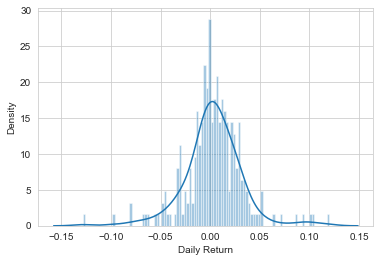

In [72]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100)

In [99]:
# value at Risk
days = 365
dt = 1 /days
mu = rets.mean()['TSLA']
sigma = rets.std()['TSLA']

0.037400012291275


In [107]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x]=np.random.normal(loc=mu*dt, scale =sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] =price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

86.07599639892578


Text(0.5, 1.0, 'monte carlo analysis')

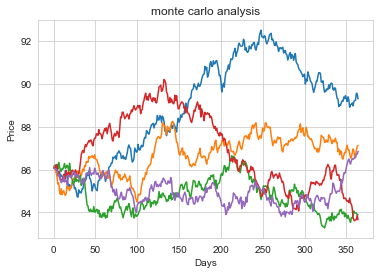

In [108]:
start_price=TSLA.iloc[0,5]
print(start_price)
for run in range(5):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('monte carlo analysis')

In [114]:
runs = 1000
simulations = np.zeros(runs)

np.set_printoptions(threshold =5)
for run in range(runs):
        simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

[0. 0. 0. ... 0. 0. 0.]


(array([1., 0., 1., ..., 0., 0., 1.]),
 array([78.16433242, 78.37018162, 78.57603082, ..., 98.33755412,
        98.54340332, 98.74925252]),
 <BarContainer object of 100 artists>)

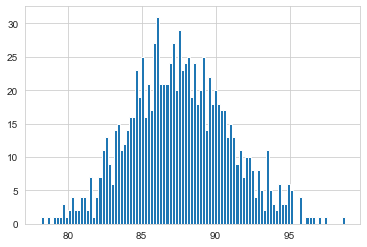

In [115]:
plt.hist(simulations, bins=100)

In [125]:
q =np.percentile(simulations, 5)

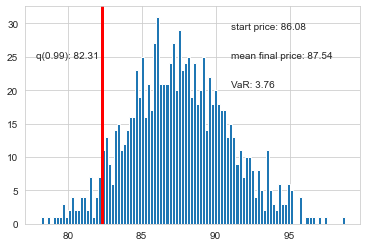

In [126]:
plt.hist(simulations, bins=100)

plt.figtext(0.6, 0.8, s = 'start price: {:0.2f}'.format(start_price))
plt.figtext(0.6, 0.7, s = 'mean final price: {:0.2f}'.format(simulations.mean()))
plt.figtext(0.6, 0.6, s = 'VaR: {:0.2f}'.format(start_price - q))
plt.figtext(0.15, 0.7, s = 'q(0.99): {:0.2f}'.format(q))
            
plt.axvline(x=q, linewidth=3, color='r')


